In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [7]:
img = image.load_img("based_data/training/previous_slide/2023-01-09-105526545634.jpg")

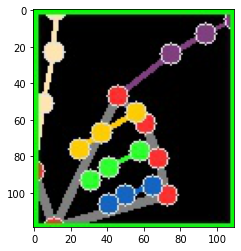

In [8]:
plt.imshow(img)

In [17]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [18]:
train_dataset = train.flow_from_directory('base_data/training/', target_size = (100,100), batch_size = 3, class_mode = 'binary')
validation_dataset = validation.flow_from_directory('base_data/validation/', target_size = (100,100), batch_size = 3, class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [19]:
train_dataset.class_indices

{'next_slide': 0, 'previous_slide': 1}

In [26]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (100,100,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])

In [28]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [30]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 1s 127ms/step - loss: 1.0782 - accuracy: 0.6154 - val_loss: 0.1639 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 0s 57ms/step - loss: 0.0635 - accuracy: 1.0000 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 0s 54ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9750
Epoch 4/30
5/5 [==============================] - 0s 53ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 0s 53ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.8689e-04 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 54ms/step - loss: 3.9289e-04 - accuracy: 1.0000 - val_loss: 5.4572e-04 - val_accuracy: 1.0000
Epoch 8/30
5/5

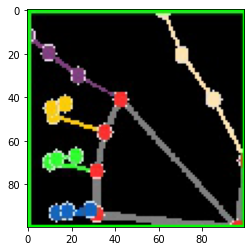

1/1 [==============================] - 0s 37ms/step
next slide


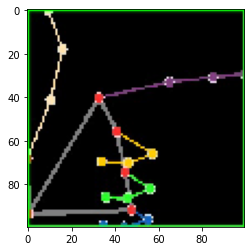

1/1 [==============================] - 0s 23ms/step
previous slide


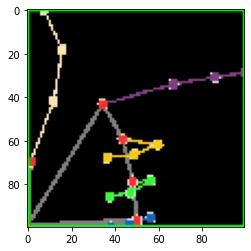

1/1 [==============================] - 0s 22ms/step
previous slide


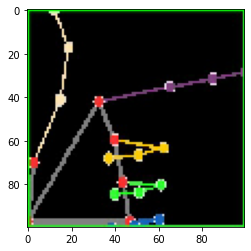

1/1 [==============================] - 0s 22ms/step
previous slide


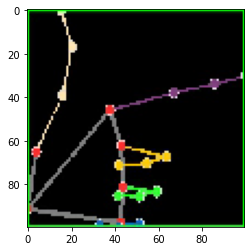

1/1 [==============================] - 0s 22ms/step
previous slide


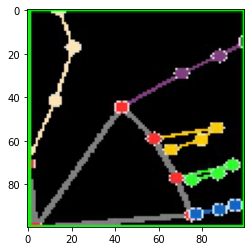

1/1 [==============================] - 0s 23ms/step
previous slide


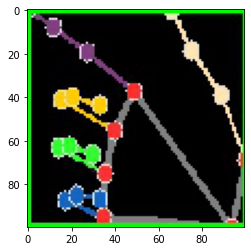

1/1 [==============================] - 0s 22ms/step
next slide


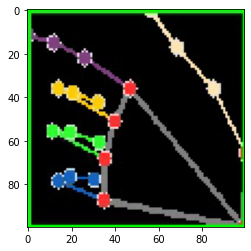

1/1 [==============================] - 0s 20ms/step
next slide


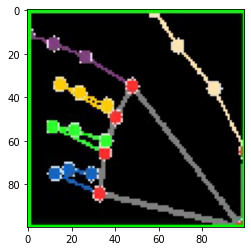

1/1 [==============================] - 0s 21ms/step
next slide


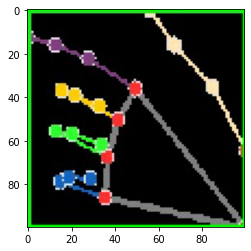

1/1 [==============================] - 0s 21ms/step
next slide


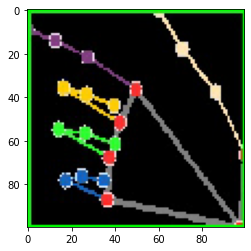

1/1 [==============================] - 0s 20ms/step
next slide


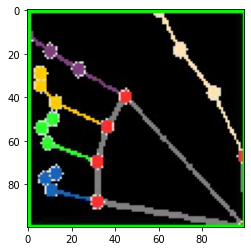

1/1 [==============================] - 0s 19ms/step
next slide


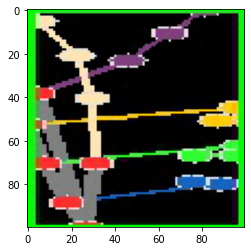

1/1 [==============================] - 0s 21ms/step
next slide


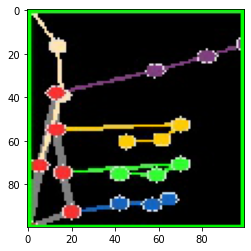

1/1 [==============================] - 0s 22ms/step
previous slide


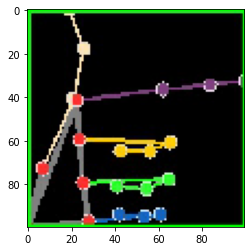

1/1 [==============================] - 0s 22ms/step
next slide


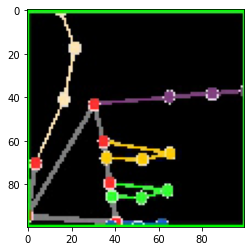

1/1 [==============================] - 0s 21ms/step
next slide


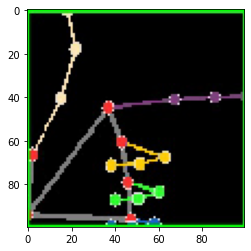

1/1 [==============================] - 0s 19ms/step
previous slide


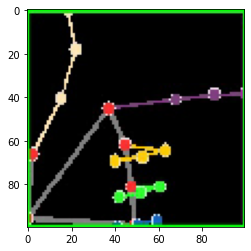

1/1 [==============================] - 0s 20ms/step
previous slide


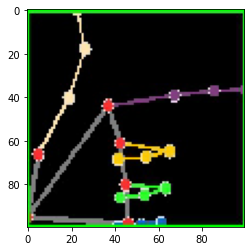

1/1 [==============================] - 0s 19ms/step
next slide


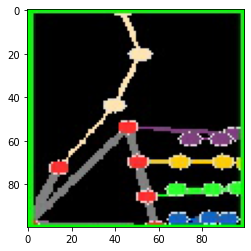

1/1 [==============================] - 0s 21ms/step
previous slide


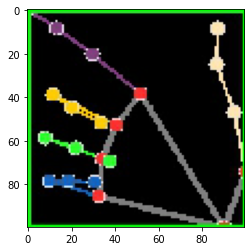

1/1 [==============================] - 0s 24ms/step
next slide


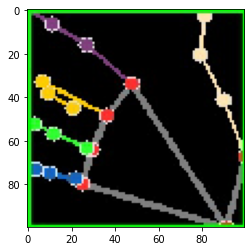

1/1 [==============================] - 0s 21ms/step
next slide


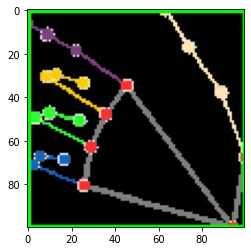

1/1 [==============================] - 0s 20ms/step
next slide


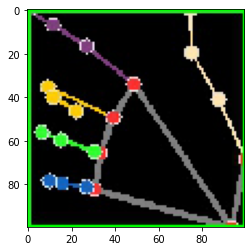

1/1 [==============================] - 0s 20ms/step
next slide


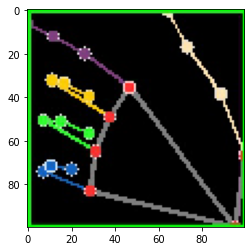

1/1 [==============================] - 0s 20ms/step
next slide


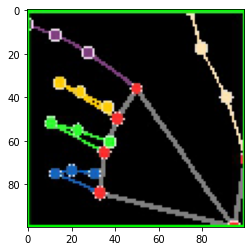

1/1 [==============================] - 0s 20ms/step
next slide


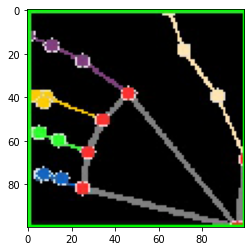

1/1 [==============================] - 0s 21ms/step
next slide


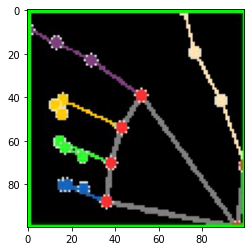

1/1 [==============================] - 0s 21ms/step
next slide


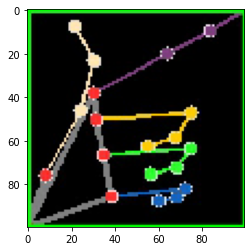

1/1 [==============================] - 0s 19ms/step
next slide


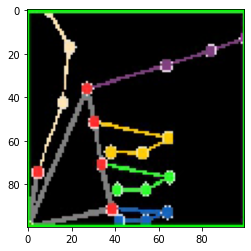

1/1 [==============================] - 0s 21ms/step
next slide


In [34]:
dir_path = 'base_data/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if(val == 0) :
        print('next slide')
    else:
        print('previous slide')